# Structures analysis

Files:
- LTS_CONFCNT_ONLY.OUT : contains the classes and structures in terms of substituted atoms

In [1]:
import sys
sys.path.insert(1, '../../crystal-code-tools/crystal_functions/crystal_functions/')

from file_readwrite import Crystal_output, write_cry_properties, Crystal_input, write_cry_gui,write_cry_input
from execute import runcry
from convert import cry_gui2pmg

from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.io.cif import CifWriter
from ase.visualize import view

from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.core.surface import SlabGenerator
import numpy as np
import pandas as pd

In [2]:
path = '/Users/brunocamino/Desktop/Imperial/cmsg_icl/solid-solutions/data/'
file = 'LTS_CONFCNT_ONLY'

new_atom = 'Li'

### Read the structures from the output files and replace with new_atom
This cell generates the structures list. This contains all the 4023 structures as pymatgen structure objects

In [3]:
cry_output = Crystal_output(path+file)
cry_output.config_analysis()

original_structure = cry_gui2pmg(path+file)
structuress = []
ti_atoms = []
for substitutions in cry_output.atom_type2:
    new_structure = original_structure.copy()
    for i in substitutions:
        new_structure.replace(i-1,new_atom)
    structuress.append(new_structure)
    ti_atoms.append((np.array(cry_output.atom_type1[i])-1).tolist())



In [4]:
#view(AseAtomsAdaptor().get_atoms(structures[300]))

In [5]:
#All structures
structures = structuress

In [6]:
#Random structures
'''structures = []
ti_atoms = []
for i in np.random.choice(4022,size = 100, replace=False):
    structures.append(structuress[i])
    ti_atoms.append((np.array(cry_output.atom_type1[i])-1).tolist())'''

'structures = []\nti_atoms = []\nfor i in np.random.choice(4022,size = 100, replace=False):\n    structures.append(structuress[i])\n    ti_atoms.append((np.array(cry_output.atom_type1[i])-1).tolist())'

### Selected structures

In [7]:
'''layers = cry_gui2pmg('data/structures/Layers.f34')
ordered = cry_gui2pmg('data/structures/Ordered.f34')
dispersed = cry_gui2pmg('data/structures/Dispersed.f34')
structures = [dispersed,ordered,layers]
ti_atoms = []
for structure in structures:
    ti = []
    for i,atom in enumerate(structure.atomic_numbers):
        if atom == 22:
            ti.append(i)
    ti_atoms.append(ti)'''

"layers = cry_gui2pmg('data/structures/Layers.f34')\nordered = cry_gui2pmg('data/structures/Ordered.f34')\ndispersed = cry_gui2pmg('data/structures/Dispersed.f34')\nstructures = [dispersed,ordered,layers]\nti_atoms = []\nfor structure in structures:\n    ti = []\n    for i,atom in enumerate(structure.atomic_numbers):\n        if atom == 22:\n            ti.append(i)\n    ti_atoms.append(ti)"

In [8]:
'''names = ['data/structures/2.f34', 'data/structures/119.f34' , 'data/structures/127.f34', 'data/structures/218.f34',    
'data/structures/348.f34',
'data/structures/650.f34',  
'data/structures/721.f34',      
'data/structures/840.f34',      
'data/structures/868.f34',         
'data/structures/1000.f34',
'data/structures/1363.f34',
'data/structures/1435.f34',
'data/structures/1526.f34',
'data/structures/1639.f34',
'data/structures/1887.f34',
'data/structures/1688.f34',
'data/structures/2312.f34',
'data/structures/3579.f34',
'data/structures/3842.f34',
'data/structures/1126.f34']
layers = cry_gui2pmg('data/structures/Layers.f34')
ordered = cry_gui2pmg('data/structures/Ordered.f34')
dispersed = cry_gui2pmg('data/structures/Dispersed.f34')
structures = [dispersed,ordered,layers]
ti_atoms = []
structures = []
for struc in names:
    structures.append(cry_gui2pmg(struc))

    
for structure in structures:
    ti = []
    for i,atom in enumerate(structure.atomic_numbers):
        if atom == 22:
            ti.append(i)
    ti_atoms.append(ti)'''

"names = ['data/structures/2.f34', 'data/structures/119.f34' , 'data/structures/127.f34', 'data/structures/218.f34',    \n'data/structures/348.f34',\n'data/structures/650.f34',  \n'data/structures/721.f34',      \n'data/structures/840.f34',      \n'data/structures/868.f34',         \n'data/structures/1000.f34',\n'data/structures/1363.f34',\n'data/structures/1435.f34',\n'data/structures/1526.f34',\n'data/structures/1639.f34',\n'data/structures/1887.f34',\n'data/structures/1688.f34',\n'data/structures/2312.f34',\n'data/structures/3579.f34',\n'data/structures/3842.f34',\n'data/structures/1126.f34']\nlayers = cry_gui2pmg('data/structures/Layers.f34')\nordered = cry_gui2pmg('data/structures/Ordered.f34')\ndispersed = cry_gui2pmg('data/structures/Dispersed.f34')\nstructures = [dispersed,ordered,layers]\nti_atoms = []\nstructures = []\nfor struc in names:\n    structures.append(cry_gui2pmg(struc))\n\n    \nfor structure in structures:\n    ti = []\n    for i,atom in enumerate(structure.atomic

In [9]:
'''selected_structures = []
for i, struc in enumerate(names):
    selected_structures.append(structures[int(struc[16:-4])-1])
structures = selected_structures'''

'selected_structures = []\nfor i, struc in enumerate(names):\n    selected_structures.append(structures[int(struc[16:-4])-1])\nstructures = selected_structures'

### Space group

In [10]:
space_group = []
for structure in structures:
    space_group.append(SpacegroupAnalyzer(structure).get_space_group_number())
space_group

[164,
 8,
 8,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 8,
 1,
 1,
 8,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 8,
 44,
 8,
 1,
 1,
 8,
 1,
 8,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 44,
 8,
 1,
 1,
 8,
 8,
 8,
 160,
 1,
 1,
 8,
 1,
 1,
 8,
 1,
 1,
 1,
 8,
 8,
 1,
 8,
 8,
 1,
 1,
 160,
 160,
 8,
 1,
 1,
 8,
 8,
 8,
 8,
 1,
 8,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 8,
 44,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 8,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 8,
 1,
 1,
 1,
 1,
 8,
 1,
 8,
 1,
 1,
 1,
 8,
 1,
 8,
 1,
 1,
 1,
 8,
 1,
 8,
 1,
 8,
 8,
 1,
 1,
 8,
 1,
 160,
 1,
 8,
 1,
 8,
 8,
 1,
 8,
 1,
 8,
 1,
 146,
 1,
 8,
 8,
 

### Shells

In [11]:
shells = np.unique(np.round(structures[0].distance_matrix[0],decimals=6)).tolist()
shells

[0.0, 2.54275, 3.595992, 4.404172, 5.0855, 5.685762, 6.22844, 7.62825]

### Average Ti-Ti distance

In [12]:
average_ti = []
for n,structure in enumerate(structures):
    average = 0.
    for i in ti_atoms[n]:
        for j in ti_atoms[n]: 
            if i != j:
                average += round(structure.sites[i].distance(structure.sites[j]),6)
    average_ti.append(average/(len(ti_atoms[n])**2))

In [13]:
#average_ti

### Average second coordination 
The number of Ti atoms in the second shell averaged over all Ti atoms

In [14]:
second_coord_sum = []
for n,structure in enumerate(structures):
    sum_coord = 0
    for i in ti_atoms[n]:
        for j in ti_atoms[n]:
            if round(structure.sites[i].distance(structure.sites[j]),6) == round(shells[2],6):
                sum_coord += 1
    second_coord_sum.append(sum_coord)
second_coord_average = (np.array(second_coord_sum)/len(ti_atoms[n])).tolist()


In [15]:
#second_coord_average

In [16]:
np.unique(np.array(second_coord_average))

array([4.44444444, 4.66666667, 4.88888889, 5.11111111, 5.33333333])

### Average second and fourth coordination 
The number of Ti atoms in the second and fourth shells averaged over all Ti atoms

In [17]:
second_third_coord_sum = []
for n,structure in enumerate(structures):
    sum_coord = 0
    for i in ti_atoms[n]:
        for j in ti_atoms[n]:
            if round(structure.sites[i].distance(structure.sites[j]),6) == round(shells[2],6) or \
             round(structure.sites[i].distance(structure.sites[j]),6) == round(shells[4],6):
                sum_coord += 1
    second_third_coord_sum.append(sum_coord)       
second_third_coord_average = (np.array(second_third_coord_sum)/len(ti_atoms[n])).tolist()

In [18]:
np.unique(np.array(second_third_coord_average))

array([5.33333333, 5.55555556, 5.77777778, 6.        , 6.22222222,
       6.66666667])

### Max and min coordination & Ti distribution

#### Second shell

In [19]:
second_coord_max = []
second_coord_min = []
ti_second_shell_atom = []
n_atoms_second_shell = []
for n,structure in enumerate(structures):
    distance = []
    distance_atoms = []
    for i in ti_atoms[n]:
        dist = 0
        dist_atom = []
        for j in ti_atoms[n]:
            if round(structure.sites[i].distance(structure.sites[j]),6) == round(shells[2],6):
                #print(i,j,structure.sites[i].distance(structure.sites[j]))
                dist += 1
                dist_atom.append(j)
        distance_atoms.append(dist_atom)
        #print(i,j,distance_atoms)
        distance.append(dist)
        #print(i,j,distance)
        max_coord_atoms = max(enumerate(distance_atoms), key = lambda tup: len(tup[1]))[1]
        atom_coords = []
        '''for atom in max_coord_atoms:
            atom_coords.append(structure.cart_coords[atom].tolist())'''
    n_atoms_second_shell.append(distance)
    ti_second_shell_atom.append(distance_atoms)
    second_coord_max.append(max(distance))
    second_coord_min.append(min(distance))
n_atoms_second_shell

[[3, 3, 4, 4, 6, 5, 5, 5, 5],
 [3, 3, 5, 5, 4, 4, 6, 6, 6],
 [2, 4, 5, 5, 4, 4, 6, 6, 6],
 [3, 3, 5, 5, 4, 4, 6, 6, 6],
 [2, 4, 5, 5, 4, 4, 6, 6, 6],
 [2, 3, 5, 4, 5, 5, 5, 5, 6],
 [3, 3, 6, 4, 4, 4, 5, 5, 6],
 [2, 3, 4, 5, 5, 5, 5, 6, 5],
 [3, 3, 5, 5, 4, 4, 6, 6, 6],
 [5, 5, 5, 5, 5, 5, 6, 6, 6],
 [4, 5, 5, 4, 5, 5, 6, 6, 6],
 [5, 4, 5, 3, 4, 5, 6, 5, 7],
 [3, 3, 6, 4, 4, 4, 5, 5, 6],
 [2, 3, 4, 5, 5, 5, 5, 6, 5],
 [5, 5, 5, 5, 5, 5, 6, 6, 6],
 [4, 5, 5, 4, 5, 5, 6, 6, 6],
 [2, 3, 4, 5, 5, 5, 5, 6, 5],
 [5, 5, 5, 5, 5, 5, 6, 6, 6],
 [4, 5, 5, 4, 5, 5, 6, 6, 6],
 [3, 3, 5, 5, 4, 4, 6, 6, 6],
 [5, 5, 5, 5, 5, 5, 6, 6, 6],
 [4, 5, 5, 4, 5, 5, 6, 6, 6],
 [5, 4, 5, 3, 4, 5, 6, 5, 7],
 [4, 5, 5, 4, 5, 5, 6, 6, 6],
 [5, 4, 5, 3, 4, 5, 6, 5, 7],
 [2, 3, 5, 4, 5, 5, 5, 5, 6],
 [3, 3, 6, 4, 4, 4, 5, 5, 6],
 [2, 3, 4, 5, 5, 5, 5, 6, 5],
 [5, 5, 5, 5, 5, 5, 6, 6, 6],
 [4, 5, 5, 4, 5, 5, 6, 6, 6],
 [2, 3, 4, 5, 5, 5, 5, 6, 5],
 [3, 3, 5, 5, 4, 4, 6, 6, 6],
 [5, 5, 5, 5, 5, 5, 6, 6, 6],
 [4, 5, 5,

In [20]:
unique_coord, first_occ, total_occ = np.unique(np.sort(np.array(n_atoms_second_shell),axis=1),axis=0,return_counts=True,return_index=True)
display(unique_coord)
display(first_occ)
display(total_occ)

array([[2, 3, 4, 5, 5, 5, 5, 5, 6],
       [2, 4, 4, 4, 5, 5, 6, 6, 6],
       [3, 3, 4, 4, 4, 5, 5, 6, 6],
       [3, 3, 4, 4, 5, 5, 5, 5, 6],
       [3, 3, 4, 4, 5, 5, 6, 6, 6],
       [3, 4, 4, 5, 5, 5, 5, 6, 7],
       [4, 4, 5, 5, 5, 5, 6, 6, 6],
       [5, 5, 5, 5, 5, 5, 6, 6, 6]])

array([ 5,  2,  6,  0,  1, 11, 10,  9])

array([  86,    5,   35,    1,  156, 2466,  804,  470])

### Find structures belonging to classes based on unique_coordination

Almost identical to the number of atoms in second shell

In [21]:
structure_groups = []
for unique in unique_coord:
    structure_groups.append(np.where(np.all(np.sort(np.array(n_atoms_second_shell),axis=1) == unique,axis=1))[0].tolist())

In [22]:
for i,structure_group in enumerate(structure_groups):
    print(total_occ[i])
    for n in structure_group:
        print(names[n][16:-4])
    print('')

86


NameError: name 'names' is not defined

In [ ]:
geom_block = ['Classificationtests\n','EXTERNAL\n','EXTPRT\n','OPTGEOM\n','END\n']
bs_block = ['BASISSET\n', 'POV-TZVP\n']
func_block = ['DFT\n', 'B3LYP\n', 'XXLGRID\n', 'ENDDFT\n']
scf_block = [['TOLINTEG\n', '5 5 5 5 10\n'],
             ['SHRINK\n', '4 8\n'],
             ['MAXCYCLE\n', '200\n'],
             ['FMIXING\n', '70\n'],
             'DIIS\n',
             'ENDSCF\n']

cry_input = Crystal_input('data/input.d12')
for i in first_occ:
    name1 = 'data/Ti_S_%s.gui'%i
    name2 = 'data/Ti_S_%s.f34'%i
    write_cry_gui(name1,structures[i],symm=False)
    write_cry_gui(name2,structures[i],symm=False)
    write_cry_input(name1[:-3]+'d12',crystal_input=cry_input)
    #runcry(name1[:-4])
    #CifWriter(structures[i]).write_file(name1[:-3]+'cif')

#### Fourth shell

In [ ]:
fourth_coord_max = []
fourth_coord_min = []
ti_fourth_shell_atom = []
n_atoms_fourth_shell = []
for n,structure in enumerate(structures):
    distance = []
    distance_atoms = []
    for i in ti_atoms[n]:
        dist = 0
        dist_atom = []
        for j in ti_atoms[n]:
            if round(structure.sites[i].distance(structure.sites[j]),6) == round(shells[4],6):
                #print(i,j,structure.sites[i].distance(structure.sites[j]))
                dist += 1
                dist_atom.append(j)
        distance_atoms.append(dist_atom)
        #print(i,j,distance_atoms)
        distance.append(dist)
        #print(i,j,distance)
        max_coord_atoms = max(enumerate(distance_atoms), key = lambda tup: len(tup[1]))[1]
        atom_coords = []
        '''for atom in max_coord_atoms:
            atom_coords.append(structure.cart_coords[atom].tolist())'''
    n_atoms_fourth_shell.append(distance)
    ti_fourth_shell_atom.append(distance_atoms)
    fourth_coord_max.append(max(distance))
    fourth_coord_min.append(min(distance))


In [ ]:
np.unique(np.sort(np.array(n_atoms_fourth_shell),axis=1),axis=0,return_counts=True,return_index=True)

#### Combine second shell and fourth shell

In [ ]:
second_fourth_coord_max = []
second_fourth_coord_min = []
ti_second_fourth_shell_atom = []
n_atoms_second_fourth_shell = []
for n,structure in enumerate(structures):
    distance1 = []
    distance2 = []
    distance_atoms = []
    for i in ti_atoms[n]:
        dist1 = 0
        dist2 = 0
        dist1_atom = []
        dist2_atom = []
        for j in ti_atoms[n]:
            if round(structure.sites[i].distance(structure.sites[j]),6) == round(shells[2],6):
                dist1 += 1
                dist1_atom.append(j)
            if round(structure.sites[i].distance(structure.sites[j]),6) == round(shells[4],6):
                dist2 += 1
                dist2_atom.append(j)
        distance_atoms.append(dist1_atom)
        #print(i,j,distance_atoms)
        distance1.append(dist1)
        distance2.append(dist2)
        #print(i,j,distance1)
        max_coord_atoms = max(enumerate(distance_atoms), key = lambda tup: len(tup[1]))[1]
        atom_coords = []
        '''for atom in max_coord_atoms:
            atom_coords.append(structure.cart_coords[atom].tolist())'''
    distance2 = (np.array(distance2)[np.argsort(distance1)]).tolist()
    distance1.sort()
    distance1.extend(distance2)
    n_atoms_second_fourth_shell.append(distance1)
    ti_second_fourth_shell_atom.append(distance_atoms)
    second_fourth_coord_max.append(max(distance))
    second_fourth_coord_min.append(min(distance))

In [ ]:
np.unique(np.array(n_atoms_second_fourth_shell),axis=0,return_counts=True,return_index=True)

#### Std of number of atoms second shell

In [ ]:
np.std(np.unique(np.sort(np.array(n_atoms_second_shell),axis=1),axis=0,return_counts=True)[0],axis=1)

### Individual distances

#### Sum distribution, average distance

In [ ]:
sum_distances = []
average_distances = []
std_distances = []
centroid_dev = []
single_dist_final = []
single_dist_all_sorted = []
single_dist_final_flat = []
for n,structure in enumerate(structures):
    average_distances_atom = []
    sum_distances_atom = []
    centroid_dev_atom = []
    single_dist_atom = []
    single_dist_atom_ext = []
    #std_distances_atom = []
    ti_dist_ext = []
    for i in range(len(ti_atoms[n])):
        dist = 0
        atom_coord = []
        ti_dist = []
        for j in ti_second_shell_atom[n][i]:
            atom_coord.append(structure.cart_coords[j].tolist())
            single_dist = []
            for k in ti_second_shell_atom[n][i]:
                if j != k:
                    single_dist.append(round(structure.sites[j].distance(structure.sites[k]),6))
                    dist += round(structure.sites[j].distance(structure.sites[k]),6)
            single_dist.sort()
            #print(single_dist)
            ti_dist.append(single_dist)
            ti_dist_ext.extend(single_dist)
        ti_dist.sort()
        ti_dist_ext.extend([item for sublist in ti_dist for item in sublist])
        #print(ti_dist)
        #center = centroidnp(np.array(atom_coord))
        '''centroid_dev_atom.append(\
            np.sqrt(
                ((center-structure.cart_coords[j])[0])**2 \
            + ((center-structure.cart_coords[j])[1])**2 \
            + ((center-structure.cart_coords[j])[2])**2)
        )'''
        #std.append(np.std(atom_coord,axis=0))
        average_distances_atom.append(dist/len(ti_second_shell_atom[n][i]))
        sum_distances_atom.append(dist)
        single_dist_atom.append(ti_dist)
        single_dist_atom_ext.extend(ti_dist)
        #####TEST
        sorted_indices = np.argsort(n_atoms_second_shell[n])
        single_dist_sorted = []
        for i in sorted_indices:
            single_dist_sorted.extend(ti_dist_ext)
        #print(np.sort(np.sort(single_dist_final[n][i]),axis=0))
        single_dist_all_sorted.append(single_dist_sorted)

        ####
    sum_distances.append(sum_distances_atom)
    average_distances.append(average_distances_atom)
    centroid_dev.append(centroid_dev_atom)
    single_dist_final.append(single_dist_atom) #THIS ONE
    #print(ti_dist_ext)
    single_dist_final_flat.append(ti_dist_ext) #THIS ONE
    #std_distances.append(std)
        #print(i,j,len(ti_second_shell_atom[n][i]),dist)
#print(len(single_dist_all_sorted))
#print(single_dist_final_flat)

In [ ]:
single_dist_final[0]

In [ ]:
np.where(np.sort(np.array(n_atoms_second_shell),axis=1) == unique_coord[0])

In [ ]:
a = np.sort(np.array(n_atoms_second_shell),axis=1)
#np.all(np.sort(np.array(n_atoms_second_shell),axis=1) == unique_coord[0])
np.where((a == unique_coord[3]).all(axis=1))[0]
np.where(np.all(a == unique_coord[0],axis=1))

In [ ]:
'''for i,structure_group in enumerate(structure_groups):
    print('Group ',i)
    for x in structure_group:
        print(x, end=', ')
    print('\n')'''

In [ ]:
coord_group_all = []
for structure_group in structure_groups:
    coord_group = []
    for n in structure_group:
        coord_group.append(single_dist_final_flat[n])
    coord_group_all.append(coord_group)


In [ ]:
np.unique(np.array(coord_group_all[0]),axis=0)
unique_coord_dist = np.unique(np.array(coord_group_all[1]),axis=0)#,return_counts=True,return_index=True)
len(unique_coord_dist)

In [ ]:
np.where(np.all(np.sort(np.round(sum_distances,6),axis=1)==np.sort(np.round(sum_distances,6),axis=1)[0]))
sum_distances_sorted = np.sort(np.round(sum_distances,6),axis=1)
average_distances_sorted = np.sort(np.round(average_distances,6),axis=1)

In [ ]:
np.unique(sum_distances_sorted,axis=0, return_counts=True)

In [ ]:
np.unique(average_distances_sorted,axis=0, return_counts=True)

In [ ]:
magic_index = n_atoms_second_shell-(np.array(sum_distances)/np.amax(sum_distances[1]))

In [ ]:
magic_index

In [ ]:
magic_index[0]

In [ ]:
#second_coord_max

#### Fourth shell

In [ ]:
fourth_coord_max = []
for n,structure in enumerate(structures):
    sum_coord = []    
    for i in ti_atoms[n]:
        sum_coord_atom = 0
        for j in ti_atoms[n]:
            sum_coord_atom += (round(structure.distance_matrix[i][j],6) == round(shells[2],6))
            sum_coord_atom += (round(structure.distance_matrix[i][j],6) == round(shells[4],6))
        sum_coord.append(sum_coord_atom)
    fourth_coord_max.append(max(sum_coord))

### Standard deviation

#### Cartesian coordinates

In [ ]:
std = [] 
std_sum = []
std_std = []

#for n,structure in enumerate(structures):
for n in first_occ:
    ti_coord = []
    for i in ti_atoms[n]:
        ti_coord.append(structures[n].cart_coords[i].tolist())
    
    std.append(np.std(ti_coord,axis=0).tolist())
    std_sum.append(np.sum(np.std(ti_coord,axis=0)))
    std_std.append(np.std(np.std(ti_coord,axis=0)))
display(np.unique(std,axis=0))
display(np.unique(std_sum))
display(np.unique(std_std))

display(np.array(std_sum)/np.max(std_sum))

In [ ]:
np.array(structures[first_occ]

#### Spherical coordinates

In [ ]:
distribution_com = [] 
for n,structure in enumerate(structures[0:100]):
    ti_coord = []
    ti_coord_sph = []
    for i in ti_atoms[n]:
        ti_coord.append(structure.cart_coords[i].tolist())
    centroid = centroidnp(np.array(ti_coord))
    ti_coord = ti_coord - centroid
    for coord in ti_coord:
        ti_coord_sph.append(cart2sph(coord[0],coord[1],coord[2]))
    print(np.std(ti_coord_sph,axis=0))
        

### Compare energies

In [32]:
with open('data/Energies.txt') as file:
    data = file.readlines()
structure_index = []
energy = []
for i in range(len(data)):
    structure_index.append(int(data[i][:-2].split('\t-')[0]))
    energy.append(float(data[i][:-2].split('\t-')[1]))

np.array(structure_index)[np.argsort(np.array(structure_index))]
energy_sorted = np.array(energy)[np.argsort(np.array(structure_index))]
(max(energy_sorted)-min(energy_sorted))*27.2114/2

7.220953160999302

#### Check energy of 1 structure per class

In [30]:
energy_list = []
for i in first_occ:
    energy_list.append(energy_sorted[i]*27.2114/2)
np.array(energy_list)-np.max(np.array(energy_list))

array([-1.75146176, -0.4442261 , -1.74874062, -1.80139468,  0.        ,
       -2.15568711, -1.73826423, -2.21174259])

#### Variability inside class

In [68]:
average_energy_group = []
max_min_group = []
std_group = []
for structure_group in structure_groups:
    average_energy_group.append(np.average(np.array(energy_sorted)[structure_group]))
    max_min_group.append(np.amax(np.array(energy_sorted)[structure_group])-np.amin(np.array(energy_sorted)[structure_group]))
    std_group.append(np.std(np.array(energy_sorted)[structure_group]))
average_energy_group
(np.array(max_min_group)*27.2114/2).tolist()
std_group

[0.06290086615606892,
 0.05737816427882578,
 0.04910213783447708,
 0.0,
 0.05806827738274707,
 0.05131147010575178,
 0.054044697478060275,
 0.05146050485957488]

In [70]:
(np.amax(np.array(energy_sorted))-np.amin(np.array(energy_sorted)))*27.2114/2

7.220953160999302

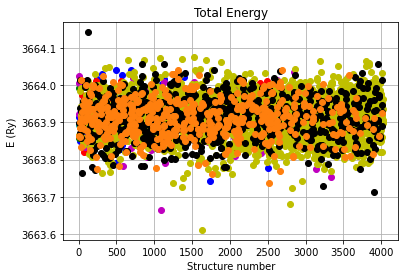

In [63]:
import matplotlib.pyplot as plt

color = ['b','g','r','c','m','y','k','tab:orange']
fig, ax = plt.subplots()
for i, structure_group in enumerate(structure_groups):
    ind = structure_group
    E = np.array(energy_sorted)[structure_group]

    
    ax.plot(ind, E,'o',c=color[i])

ax.set(xlabel='Structure number', ylabel='E (Ry)',
       title='Total Energy')
ax.grid()

#fig.savefig("test.png")
plt.show()

In [58]:
len(structure_groups)

8

### Planes

In [ ]:
slab = SlabGenerator(SpacegroupAnalyzer(structures[300]).get_conventional_standard_structure(),[1,0,0],10,10).get_slab()
#view(AseAtomsAdaptor().get_atoms(SpacegroupAnalyzer(structures[3000]).get_conventional_standard_structure()))
#view(AseAtomsAdaptor().get_atoms(slab))
len(slab)

### Distance periodic site

In [ ]:
coordination = [] 
for n,structure in enumerate(structures):
    second_coord = 0
    for i in ti_atoms[n]:        
        for j in ti_atoms[n]:
            if i != j:
                if round(structure.sites[i].distance(structure.sites[j]),6) == round(shells[2],6):
                    second_coord += 1
    #coordination.append(second_coord/len(ti_atoms[n]))
    coordination.append(second_coord)
                
coordination      

### Scan along row

#### Shells

In [ ]:
def cart2sph(x, y, z):
    hxy = np.hypot(x, y)
    r = np.hypot(hxy, z)
    el = np.arctan2(z, hxy)
    az = np.arctan2(y, x)
    if np.around(az,6) ==  np.around(2*np.pi,6) \
    or np.around(az,6) ==  -np.around(2*np.pi,6):
        az = 0.
    return [round(az,6), round(el,6), round(r,6)]

In [ ]:
def cart2cent2sph(atom,center):
    x = atom[0]-center[0]
    y = atom[1]-center[1]
    z = atom[2]-center[2]
    return cart2sph(x, y, z)

In [ ]:
def cart2sin(x, y, z):
    hxy = np.hypot(x, y)
    r = np.hypot(hxy, z)
    el = np.sin(np.arctan2(z, hxy))
    az = np.cos(np.arctan2(y, x))
    return [round(az,6), round(el,6), round(r,6)]

In [ ]:
def centroidnp(arr):
    length = arr.shape[0]
    sum_x = np.sum(arr[:, 0])
    sum_y = np.sum(arr[:, 1])
    sum_z = np.sum(arr[:, 2])
    return np.array([sum_x/length, sum_y/length, sum_z/length])

In [ ]:
#Spherical coordinates
#Make sure there are no gaps even if they have the same polar and azimuthal coords
max_row = []
for n,structure in enumerate(structures[3000:3001]):
    for i in ti_atoms[n]:
        spherical_coord = []
        row = []
        for j in ti_atoms[n]:
            #print(i,j)
            center_cart = structure.cart_coords[j]-structure.cart_coords[i]
            spherical_coord.append(cart2sph(center_cart[0],center_cart[1],center_cart[2]))   
        spherical_coord = np.around(np.array(spherical_coord),6)
        #print(spherical_coord[:,0:1],spherical_coord[:,0:1]+np.pi)
        for el in spherical_coord:
            #print(el[0:3],spherical_coord[:,0:3])
            #print(spherical_coord[:,0:2] == el[0:2],np.sum(np.prod(spherical_coord[:,0:2] == el[0:2],axis=1)))
            #print(np.sum(np.multiply(spherical_coord[:,0] == el[0]+np.pi,spherical_coord[:,1] == -el[1])))
            row.append(np.sum(np.prod(spherical_coord[:,0:2] == el[0:2],axis=1)))#+
                 #np.sum(np.multiply(spherical_coord[:,0] == el[0]+np.pi,spherical_coord[:,1] == -el[1])))
    max_row.append(max(row)+1)       
       

In [ ]:
#Sinusoidal coordinates
max_row = []
for n,structure in enumerate(structures[3000:3001]):
    for i in ti_atoms[n]:
        spherical_coord = []
        row = []
        #print(i)
        for j in ti_atoms[n]:
            #print(i,j)
            center_cart = structure.cart_coords[j]-structure.cart_coords[i]
            spherical_coord.append(cart2sin(center_cart[0],center_cart[1],center_cart[2]))   
        spherical_coord = np.around(np.array(spherical_coord),6)
        #print(spherical_coord)
        for el in spherical_coord:
            #print(spherical_coord[:,0:3])
            #print(spherical_coord[:,0:2] == el[0:2],np.sum(np.prod(spherical_coord[:,0:2] == el[0:2],axis=1))) 
            row.append(np.sum(np.prod(spherical_coord[:,0:2] == el[0:2],axis=1))+
                 np.sum(np.prod(spherical_coord[:,0:2] == -el[0:2],axis=1)))
    max_row.append(max(row)+1)       
       

In [ ]:
#get neighbours
max_radius = max(np.sum(structure.lattice.matrix,axis=1))
for n,structure in enumerate(structures[0:1]):
    for i in ti_atoms[n]:
        #print(structure.get_neighbor_list(max_radius)[3])
        for neigh in structure.get_neighbors(structure.sites[i],max_radius):
            if neigh.as_dict()['species'][0]['element'] == 'Ti':
                
        #for j in ti_atoms[n]:
            #if i != j:
                #print(structure.get_neighbors(structure.sites[i],3.))
#len(structure.get_all_neighbors(10.)[0])

# Neighbour analysis and classification

In [ ]:
shells

In [ ]:
ti_neigh_list = []
for i,structure in enumerate(structures[0:1]):
    for ti_atom_1 in ti_atoms[i]:
        ti_neigh = []
        for ti_atom_2 in ti_atoms[i]:
            if structure.distance_matrix[ti_atom_1][ti_atom_2] - shells[2] < 0.001:
                ti_neigh.append(cart2cent2sph(structure.cart_coords[ti_atom_2],structure.cart_coords[ti_atom_1]))
        ti_neigh_list.append(ti_neigh)
ti_neigh_list

In [ ]:
structures[0]

In [ ]:
structures[0].distance_matrix

### Fourier transform

In [ ]:
ti_coord = []
for i in ti_atoms[0]:
    ti_coord.append(structures[0].sites[i].coords.tolist())
np.fft.fftn(np.array(ti_coord))

In [ ]:
df = pd.DataFrame(list(zip(space_group,average_ti,second_coord_sum,second_coord_max,fourth_coord_max)),
               columns =['Space Group','Average Ti distance','Sum second coord','Max second coord','Max fourth coord'])

df[df['Space Group'] == 1]
df